In [122]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [123]:
parks = pd.read_csv('experiment_1.csv')


parks.head()

,Unnamed: 0,Park_Name,Death Total,activities,deaths
0,0,Abraham Lincoln Birthplace National Historical...,0,"['Astronomy', 'Stargazing', 'Food', 'Picnickin...",0
1,1,Acadia National Park,17,"['Arts and Culture', 'Cultural Demonstrations'...",1
2,2,Adams National Historical Park,0,"['Guided Tours', 'Living History', 'First Pers...",0
3,3,African American Civil War Memorial,0,"['Guided Tours', 'Self-Guided Tours - Walking']",0
4,4,African Burial Ground National Monument,0,"['Arts and Culture', 'Guided Tours', 'Junior R...",0


In [124]:

res = [''.join(ele) for ele in parks["activities"]]

In [125]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 50, stop_words=["and","on","or","self"])
X = vectorizer.fit_transform(res)

print(vectorizer.get_feature_names())

print(X.toarray())

['arts', 'astronomy', 'atv', 'auto', 'backcountry', 'biking', 'birdwatching', 'boating', 'bookstore', 'camping', 'canoeing', 'car', 'country', 'cross', 'cultural', 'culture', 'demonstration', 'demonstrations', 'driving', 'exhibits', 'film', 'fishing', 'food', 'freshwater', 'front', 'gathering', 'gift', 'group', 'guided', 'hands', 'hiking', 'historic', 'history', 'horse', 'horseback', 'hunting', 'junior', 'kayaking', 'living', 'museum', 'paddling', 'park', 'picnicking', 'program', 'ranger', 'riding', 'road', 'rv', 'scenic', 'shop', 'shopping', 'skiing', 'snowshoeing', 'souvenirs', 'stargazing', 'store', 'swimming', 'tours', 'trekking', 'walking', 'watching', 'weapons', 'wildlife']
[[0 1 0 ... 1 0 1]
 [1 1 0 ... 1 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 1]
 [1 1 0 ... 1 0 1]]


In [126]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

y = parks["deaths"]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



k: 1, Train/Test Score: 1.000/0.829
k: 3, Train/Test Score: 0.917/0.872
k: 5, Train/Test Score: 0.897/0.872
k: 7, Train/Test Score: 0.885/0.897
k: 9, Train/Test Score: 0.882/0.906
k: 11, Train/Test Score: 0.882/0.906
k: 13, Train/Test Score: 0.876/0.915
k: 15, Train/Test Score: 0.868/0.906
k: 17, Train/Test Score: 0.862/0.906
k: 19, Train/Test Score: 0.859/0.915
k: 21, Train/Test Score: 0.839/0.915
k: 23, Train/Test Score: 0.851/0.906
k: 25, Train/Test Score: 0.853/0.906
k: 27, Train/Test Score: 0.851/0.915
k: 29, Train/Test Score: 0.856/0.906
k: 31, Train/Test Score: 0.853/0.923
k: 33, Train/Test Score: 0.859/0.915
k: 35, Train/Test Score: 0.862/0.915
k: 37, Train/Test Score: 0.856/0.915
k: 39, Train/Test Score: 0.856/0.923


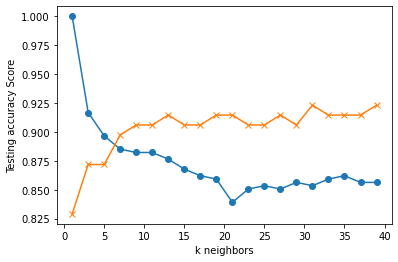

In [127]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [129]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.906
